In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
file_path='nnv_wine_bharat.csv'
df = pd.read_csv(file_path)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.1,0.32,0.24,13.10,0.050,52.0,204.0,0.9980,3.10,0.49,8.8,5
1,white,7.2,0.28,0.54,16.70,0.045,54.0,200.0,0.9990,3.08,0.49,9.5,6
2,white,6.8,0.19,0.58,14.20,0.038,51.0,164.0,0.9975,3.12,0.48,9.6,6
3,white,6.4,0.30,0.30,2.25,0.038,8.0,210.0,0.9937,3.20,0.62,9.9,6
4,white,6.5,0.30,0.29,2.25,0.037,8.0,210.0,0.9937,3.19,0.62,9.9,5


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1474.000000,1473.000000,1476.000000,1476.000000,1475.000000,1476.000000,1476.000000,1476.000000,1474.00000,1476.000000,1476.000000,1476.000000
mean,7.731615,0.406541,0.315854,4.131267,0.066178,24.292344,94.778794,0.995465,3.25171,0.571850,10.409259,5.739160
std,1.560094,0.194742,0.172574,3.872227,0.045254,15.488478,59.281020,0.002756,0.17058,0.181286,1.153477,0.853538
min,4.700000,0.080000,0.000000,0.600000,0.017000,3.000000,7.000000,0.988360,2.74000,0.250000,8.600000,3.000000
25%,6.800000,0.250000,0.220000,1.800000,0.042000,12.000000,40.750000,0.993380,3.13000,0.450000,9.500000,5.000000
50%,7.400000,0.360000,0.320000,2.300000,0.057000,22.000000,93.000000,0.995800,3.25000,0.540000,10.100000,6.000000
75%,8.300000,0.540000,0.420000,4.900000,0.080000,34.000000,139.000000,0.997400,3.36000,0.650000,11.200000,6.000000
max,15.900000,1.580000,1.660000,19.800000,0.611000,88.000000,366.500000,1.002600,4.01000,2.000000,14.900000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1476 non-null   object 
 1   fixed acidity         1474 non-null   float64
 2   volatile acidity      1473 non-null   float64
 3   citric acid           1476 non-null   float64
 4   residual sugar        1476 non-null   float64
 5   chlorides             1475 non-null   float64
 6   free sulfur dioxide   1476 non-null   float64
 7   total sulfur dioxide  1476 non-null   float64
 8   density               1476 non-null   float64
 9   pH                    1474 non-null   float64
 10  sulphates             1476 non-null   float64
 11  alcohol               1476 non-null   float64
 12  quality               1476 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 150.0+ KB


In [11]:
df.isnull().sum()

type                    0
fixed acidity           2
volatile acidity        3
citric acid             0
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
for col,value in df.items():
    if col!='type':
        df[col]=df[col].fillna(df[col].mean())
df.isnull().sum() 

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

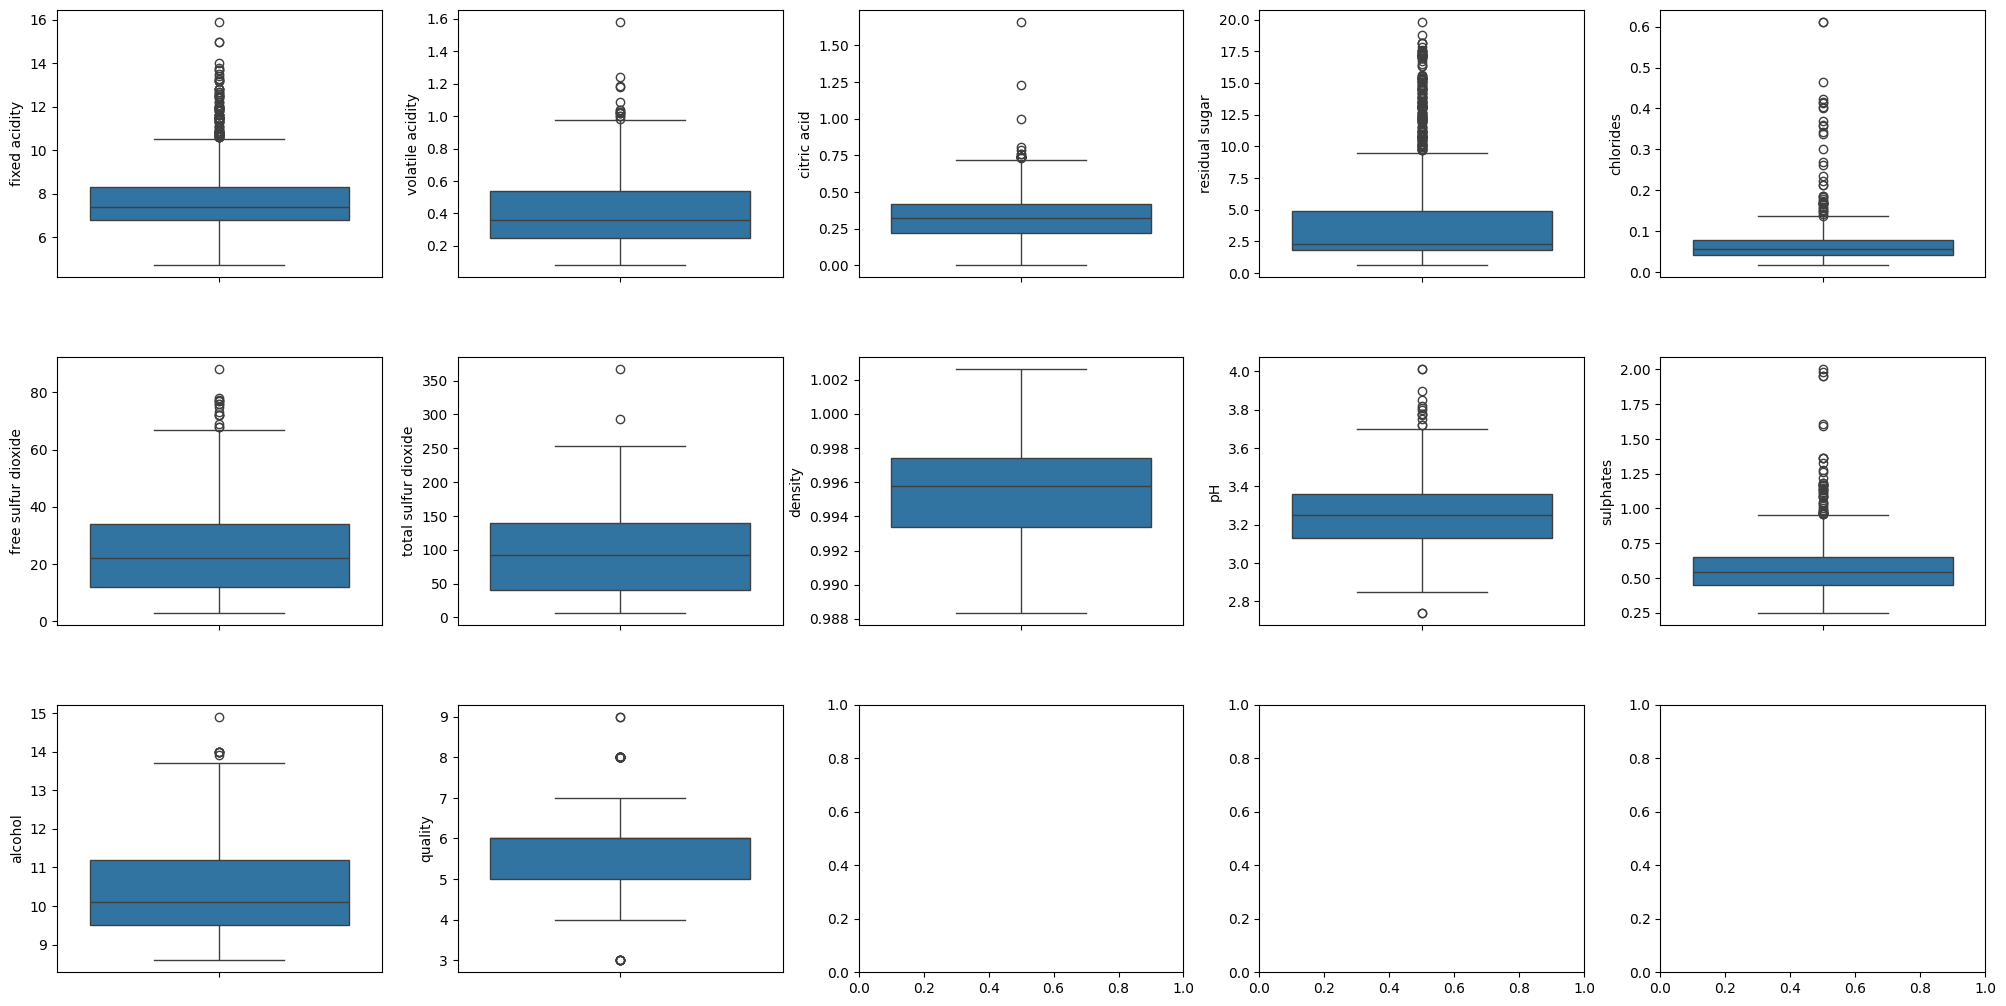

In [13]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in df.items():
    if col!='type':
        sb.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5.0)

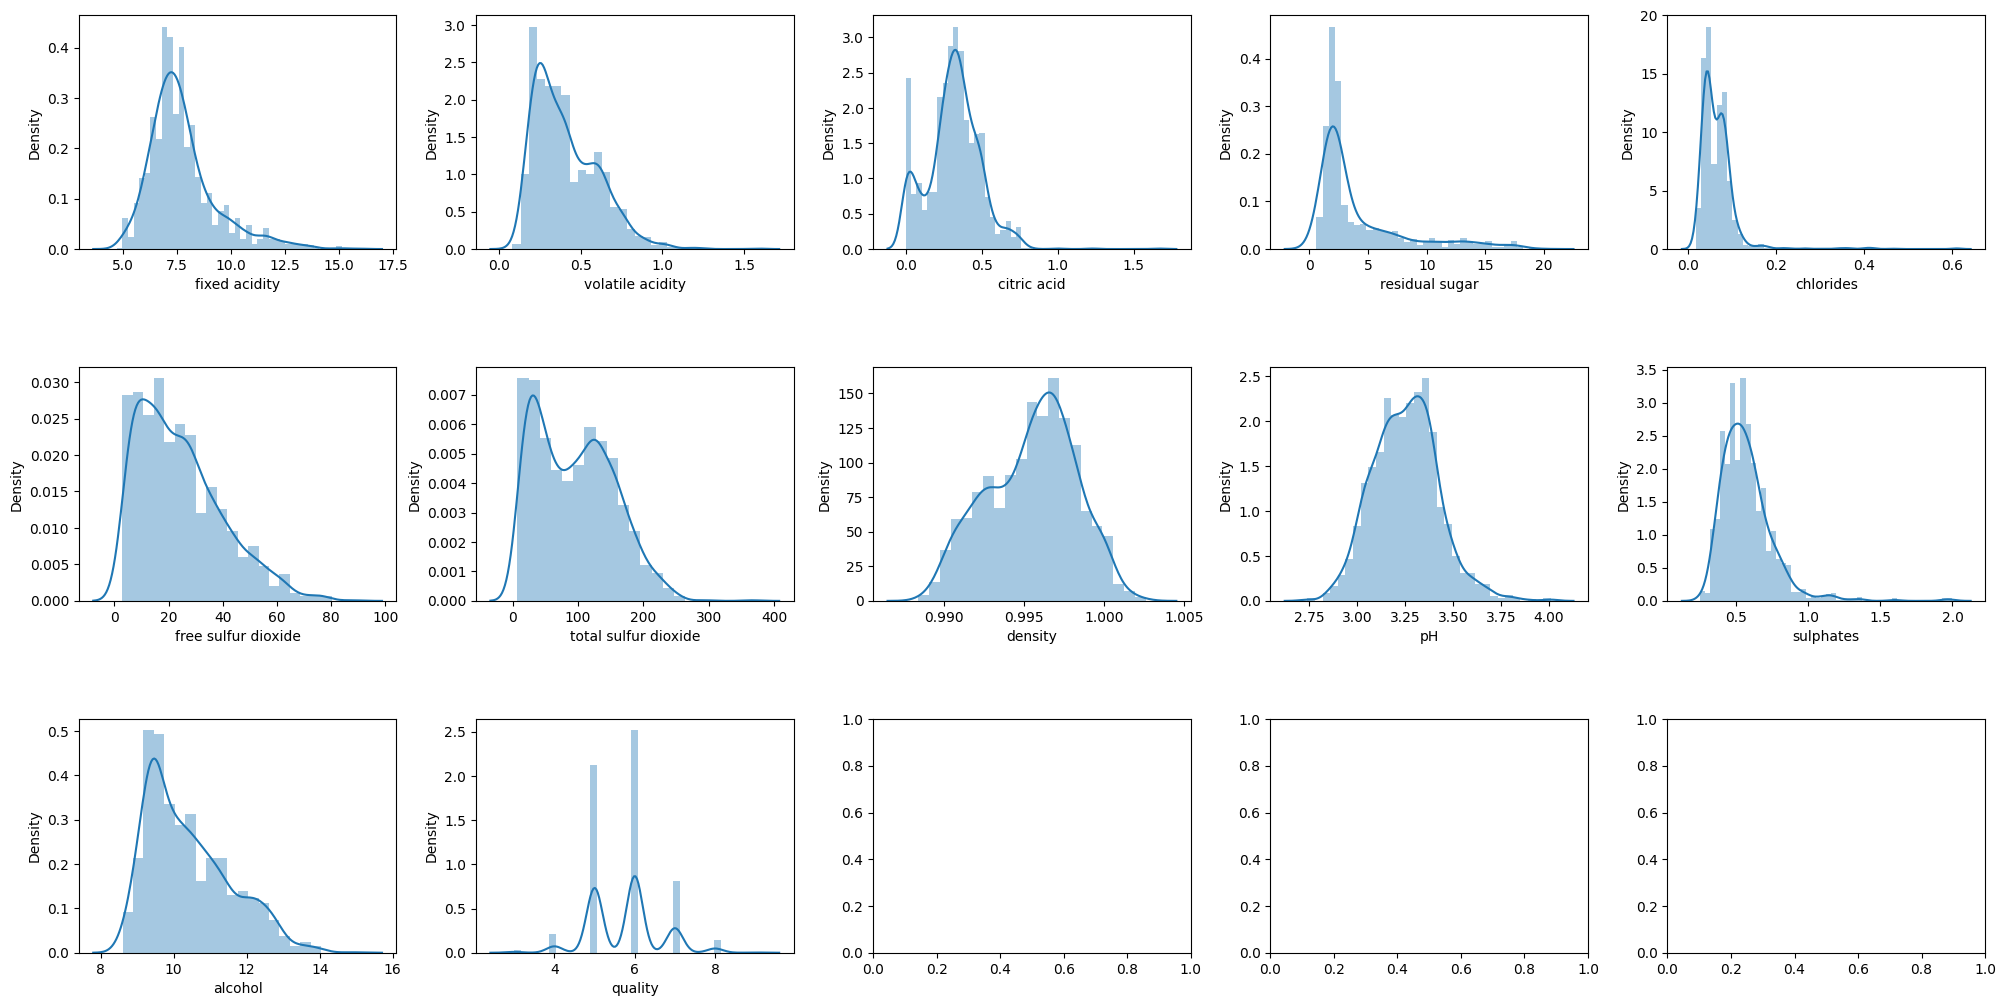

In [14]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index=0
ax=ax.flatten()

for col,value in df.items():
    if col!='type':
        sb.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5.0)

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

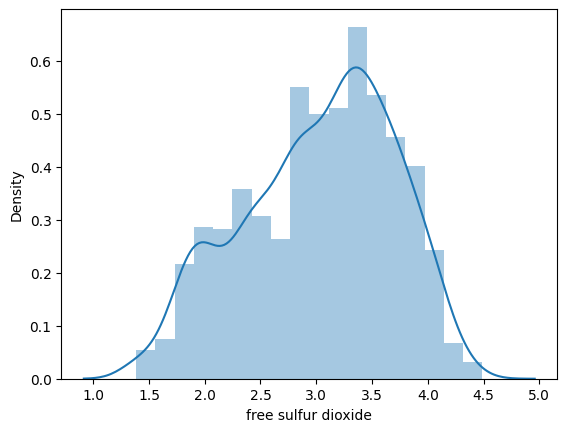

In [15]:
df['free sulfur dioxide']=np.log(1+df['free sulfur dioxide'])
sb.distplot(df['free sulfur dioxide'])

<Axes: xlabel='count', ylabel='type'>

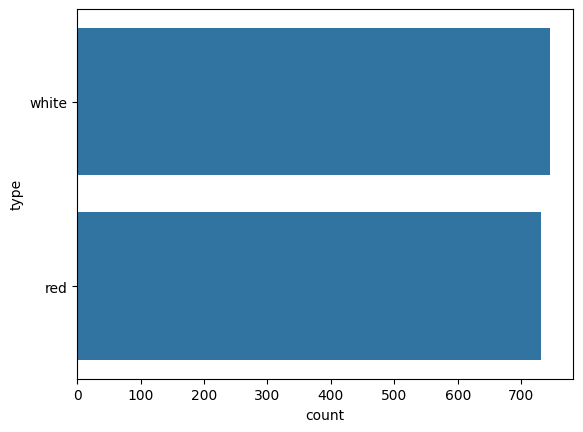

In [16]:
sb.countplot(df['type'])

<Axes: ylabel='count'>

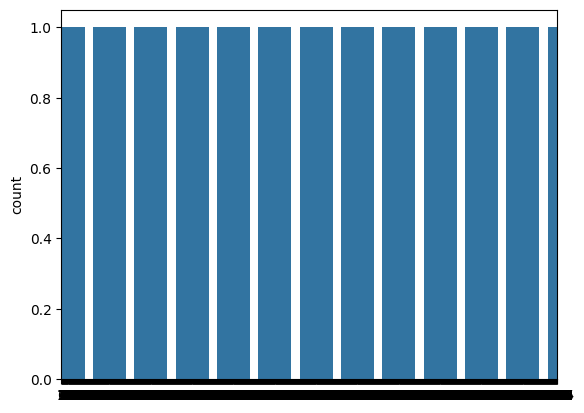

In [17]:
sb.countplot(df['quality'])

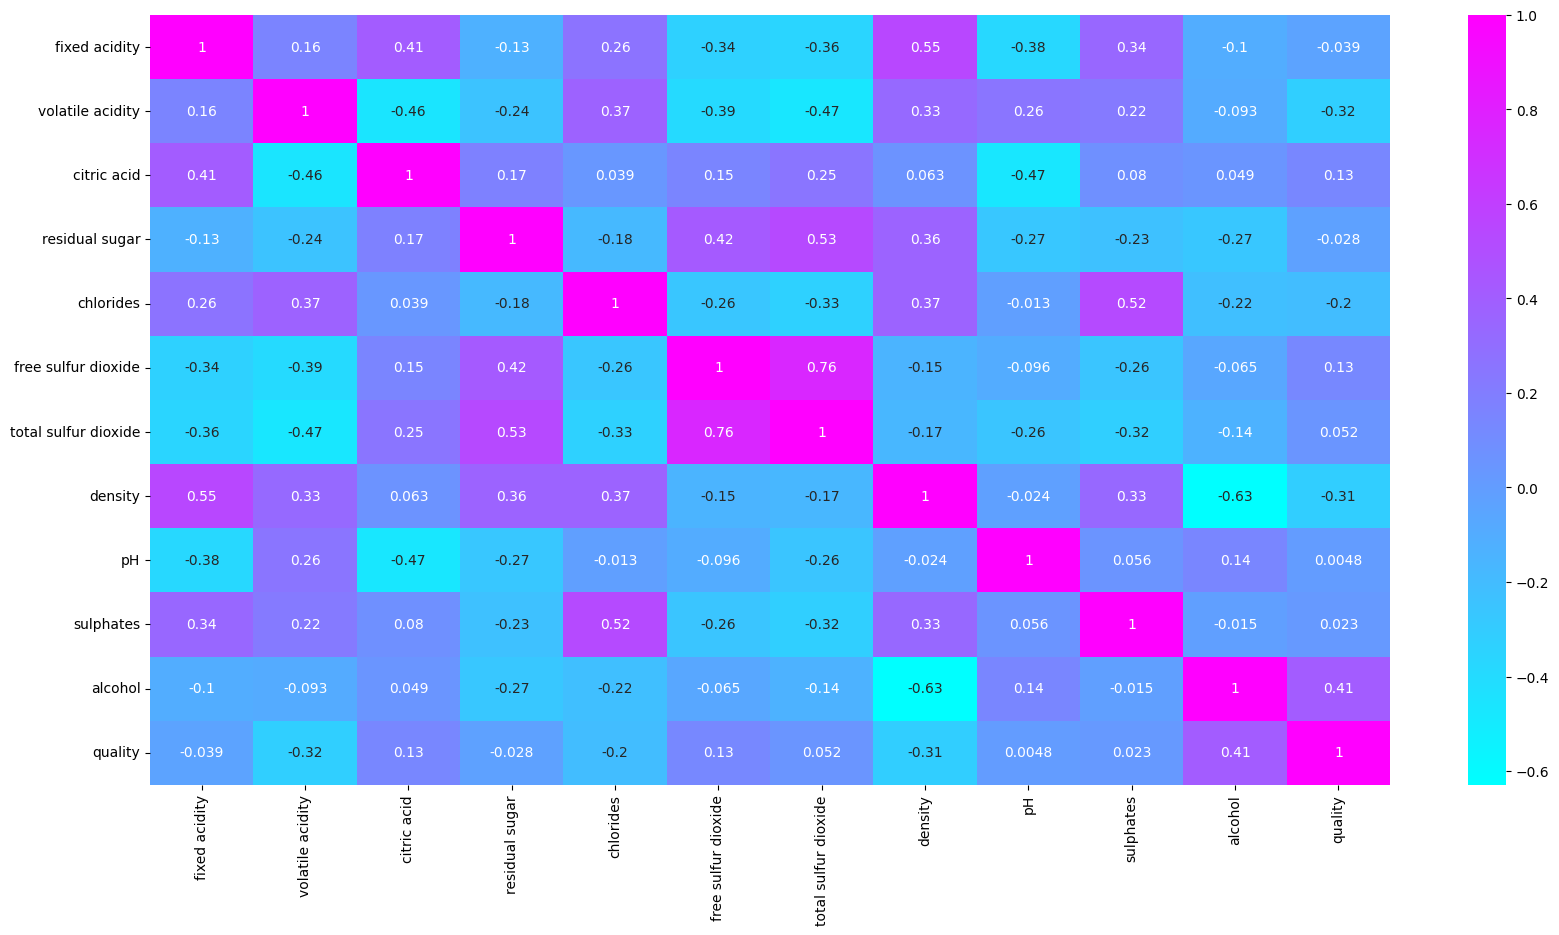

In [18]:
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()
plt.figure(figsize=(20, 10))
sb.heatmap(corr, annot=True, cmap='cool')
plt.show()

In [19]:
x = df.drop(columns=['type', 'quality'])
y = df['quality']

In [20]:
y.value_counts()

quality
6    637
5    538
7    204
4     53
8     35
3      7
9      2
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 47.15447154471545
CV Score: 46.68025652771416


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 59.891598915989164
CV Score: 41.66743014200642


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy: 65.31165311653116
CV Score: 50.34058634906092


In [41]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy: 0.6756756756756757


In [42]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 1180, number of used features: 11
[LightGBM] [Info] Start training from score -5.686975
[LightGBM] [Info] Start training from score -3.289080
[LightGBM] [Info] Start training from score -1.021181
[LightGBM] [Info] Start training from score -0.827163
[LightGBM] [Info] Start training from score -1.985673
[LightGBM] [Info] Start training from score -3.777433
[LightGBM] [Info] Start training from score -6.380123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [45]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
wine = load_wine()
x = wine.data
y = wine.target
y = y - min(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9444444444444444
